In [1]:
# Si se necesita obtener el promedio, ver el código "Base"

"""
OUTPUTS:
- Carpeta con los índices resultantes del cálculo del beta skeleton
- Archivo con las entropías 
- Imagen en pdf de entropía vs beta
"""


import numpy as np
import matplotlib.pyplot as plt
from scipy import stats #--spearman coeficient
import collections
import glob
import os
print("Se calcula el beta skeleton")
betas=[1,1.5,2,2.5,3,3.5,4,4.5,5]
#betas=[1,2,3]
numsNNB=[300,300,25,30,30,30,20,20,20,15]
#exe = "/home/valentina/Skeleton/HLSScode2/bin/LSS_BSK_calc" #local
exe = "~/Skeleton/HLSScode2/bin/./LSS_BSK_calc" #remote - magnus


def entropy(ruta,archivo, rutaSalida,beta,numNNB): #ruta es el file del catalogo. Salida es la 'extensión' para identificar i.e '.bskel_shell'
    #--Solo para un archivo de txt, un solo beta
    """Calcular BS"""
    path_beta="{}/skeleton/{}_bskel{}.BSKIndex".format(ruta,rutaSalida,str(beta))
    if(os.path.exists(path_beta)==False):
        comm = "{} -input {} -output {} -beta {} -printinfo false -numNNB {}".format(exe, archivo, rutaSalida+"_bskel"+str(beta),beta,numNNB)
        os.system(comm)
        """Mover de la carpeta """
        mover="mv ~/Skeleton/skeleton/*.BSKIndex "+path_beta
        os.system(mover)
       
    """Cargar"""
    data=np.loadtxt(path_beta)
    data=data.flatten()
    original=np.loadtxt(archivo)
    """Contar"""
    contador=collections.Counter(data)
    nodos=np.array(list(contador))
    contador_repeticiones=collections.Counter(contador.values())
    """Añadir ceros"""
    n_total=len(original)
    n_beta=len(nodos)
    diferencia=n_total-n_beta
    if((diferencia)>0):
        contador_repeticiones.update({0:diferencia})
    #print(sorted(contador_repeticiones.items()))  
    print(list(contador_repeticiones))
    repeticiones=list(contador_repeticiones.values())
    
    """Probabilidades"""
    probabilidad=[]
    for i in range(len(contador_repeticiones)): #Aquí yo comparaba todos los betas con el beta1 - si beta2 max de conex era 13 pero en beta1 era 20, yo sacaba la probabilidad de n<=13 - que era 0 pero quizá afectaba 
        """¡DUDA!= en el caso de abajo, n=19 no está pero n=20 sí, eso afecta en algo; es decir debería calcular esa probabilidad aunque sea 0?"""
        probabilidad.append(repeticiones[i]/n_total)
    probabilidad=np.array(probabilidad)
    print("Proba",probabilidad)
    entropy=-np.sum(probabilidad*np.log2(probabilidad)) #Se cambió de natural a base 2
    return entropy

#Para comparar parametros
def grafica(ruta): #Ruta del directorio que contiene los archivos
    files=glob.glob(ruta+"/*.dat")
    files.sort()
    print(files)
    entropias=[]
    for b in range(len(betas)):
        beta_files=[]
        for file in files:
            salida = file.split("/")[-1]
            beta_files.append(entropy(ruta,file,salida,betas[b],numsNNB[b]))
        entropias.append(beta_files)
    np.savetxt(ruta+"/docs-pics/entropias.txt",entropias)#Ej: 3 filas- 3 betas, 40 columnas - 40 archivos

    """for p in range(len(entropias[0])):
        plt.plot(betas,entropias[:,p])
        plt.xlabel("$\\beta$")
        plt.ylabel("$Entropy$")
        plt.savefig(ruta+"entropy.pdf")"""
    return (entropias)

#grafica("~/Skeleton/Data/Simulaciones/abacus/RSD/normal")

Se calcula el beta skeleton


In [2]:
#Selecciona un porcentaje de los datos cargados.
def select(p,datos):#p es el porcentaje y datos es el arreglo de datos
    data=np.loadtxt(datos)
    nuevo=[]
    n=len(data)*(p/100)
    while(len(nuevo)<n):
        i=np.random.choice(len(data),1)[0]
        nuevo.append(data[i])
    np.savetxt("{}_p{}".format(datos,p),nuevo)
    return nuevo


In [6]:
grafica("/home/valentina/Skeleton/Data/Simulaciones/Porcentaje")

['/home/valentina/Skeleton/Data/Simulaciones/Porcentaje/p_010_random_sphere_00_stdcosmo_norsd_z0.100.dat', '/home/valentina/Skeleton/Data/Simulaciones/Porcentaje/p_020_random_sphere_00_stdcosmo_norsd_z0.100.dat', '/home/valentina/Skeleton/Data/Simulaciones/Porcentaje/p_030_random_sphere_00_stdcosmo_norsd_z0.100.dat', '/home/valentina/Skeleton/Data/Simulaciones/Porcentaje/p_040_random_sphere_00_stdcosmo_norsd_z0.100.dat', '/home/valentina/Skeleton/Data/Simulaciones/Porcentaje/p_050_random_sphere_00_stdcosmo_norsd_z0.100.dat', '/home/valentina/Skeleton/Data/Simulaciones/Porcentaje/p_060_random_sphere_00_stdcosmo_norsd_z0.100.dat', '/home/valentina/Skeleton/Data/Simulaciones/Porcentaje/p_070_random_sphere_00_stdcosmo_norsd_z0.100.dat', '/home/valentina/Skeleton/Data/Simulaciones/Porcentaje/p_080_random_sphere_00_stdcosmo_norsd_z0.100.dat', '/home/valentina/Skeleton/Data/Simulaciones/Porcentaje/p_090_random_sphere_00_stdcosmo_norsd_z0.100.dat', '/home/valentina/Skeleton/Data/Simulaciones/P

[2, 3, 1, 4, 5, 6, 0]
Proba [3.97539016e-01 3.66116447e-01 1.25300120e-01 9.49279712e-02
 6.12244898e-03 3.00120048e-05 9.96398559e-03]
[4, 3, 2, 1, 5, 6, 0]
Proba [9.57459614e-02 3.64301707e-01 3.96971375e-01 1.26032212e-01
 6.13910489e-03 1.20374606e-04 1.06892650e-02]
[3, 1, 2, 4, 5, 6, 0]
Proba [3.62741575e-01 1.28154448e-01 4.03290209e-01 8.97420540e-02
 4.95128574e-03 5.98945855e-05 1.10605335e-02]
[1, 3, 2, 4, 5, 6, 0]
Proba [1.24888508e-01 3.63413379e-01 4.01543739e-01 9.43910806e-02
 5.62607204e-03 8.57632933e-05 1.00514580e-02]
[2, 3, 4, 1, 5, 6, 0]
Proba [3.98839075e-01 3.66396184e-01 9.63687360e-02 1.22947008e-01
 5.20466170e-03 1.34991226e-04 1.01093429e-02]
[2, 3, 4, 1, 5, 6, 0]
Proba [3.93817079e-01 3.70854997e-01 9.68203264e-02 1.22388698e-01
 5.77393443e-03 9.35591227e-05 1.02514067e-02]
[2, 3, 4, 1, 5, 6, 0]
Proba [3.97171217e-01 3.68198423e-01 9.65439339e-02 1.22007787e-01
 5.73207076e-03 1.32186118e-04 1.02143818e-02]
[3, 1, 2, 4, 5, 0]
Proba [0.24319419 0.2492438  

[[3.1941492781278122,
  3.1684578660693905,
  3.1832523186183357,
  3.176295044461515,
  3.173564306687665,
  3.16333849705503,
  3.1736624820024617,
  3.1596476909094355,
  3.15967026949637,
  3.16197221359142],
 [2.342502266149818,
  2.3533394536687418,
  2.3415254635731215,
  2.338849849043789,
  2.332267623138856,
  2.3272318334782676,
  2.3348835285017593,
  2.325968607789021,
  2.322266246552449,
  2.3263933671716677],
 [1.8128220016761356,
  1.81114381485206,
  1.8168347701971832,
  1.8155499638474077,
  1.8129209377187632,
  1.804816337953911,
  1.8035223604256683,
  1.7998910527205143,
  1.8029337607923919,
  1.8000270567073609],
 [1.8599271808731035,
  1.8516224210021808,
  1.8617158963575695,
  1.8694409076611627,
  1.877166436653842,
  1.8616582451196615,
  1.8654383723330588,
  1.8649176325675767,
  1.8691368104975126,
  1.8676737670180246],
 [1.876857618862065,
  1.8702708834928747,
  1.873331545240836,
  1.88221146526501,
  1.8854288676598987,
  1.870779638121576,
  1.87

In [34]:
p1=np.loadtxt("/home/valentina/Skeleton/Data/Simulaciones/Porcentaje/sphere_00_stdcosmo_norsd_z0.100_p100.dat")
p2=np.loadtxt("/home/valentina/Skeleton/Data/Simulaciones/Cosmic_Variance/sphere_00_stdcosmo_norsd_z0.100.dat")

print(len(p1),len(p2))

83216 83216


In [65]:
"""por=[(i*10) for i in range(1,11)]
for per in por:
    select(per,"/home/valentina/Skeleton/P/sphere_00_stdcosmo_norsd_z0.100.dat")"""
grafica("/home/valentina/Skeleton/Data/Simulaciones/Porcentaje")

['/home/valentina/Skeleton/Data/Simulaciones/Porcentaje/p_005_shell_00_stdcosmo_norsd_z0.100.dat']
[5, 7, 6, 10, 8, 9, 4, 3, 11, 2, 12, 1]
Proba [0.23384791 0.14808462 0.21269297 0.00686106 0.06460835 0.02572899
 0.19325329 0.09033734 0.00285878 0.01772441 0.00171527 0.00228702]
[2, 3, 4, 1, 5]
Proba [0.37392796 0.44596913 0.1137793  0.05889079 0.00743282]
[1, 2, 3, 4, 0]
Proba [0.27844483 0.46026301 0.19839909 0.01486564 0.04802744]


[[2.7484956865079644], [1.7001709268522796], [1.7924432532638852]]

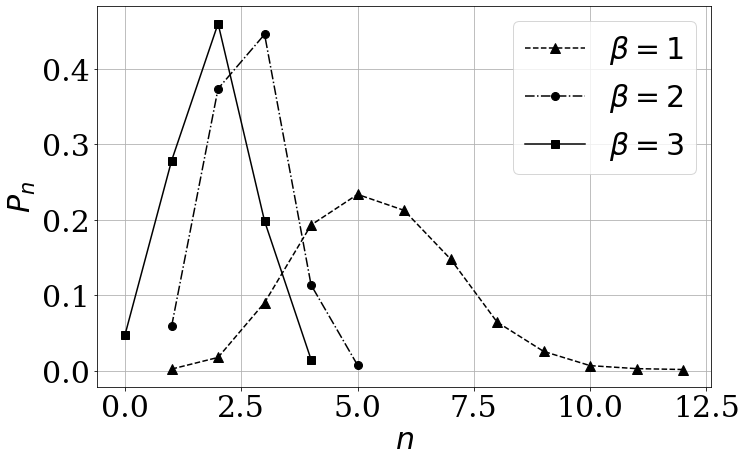

In [7]:
beta1=[5, 7, 6, 10, 8, 9, 4, 3, 11, 2, 12, 1]
p_beta1=[0.23384791, 0.14808462, 0.21269297, 0.00686106, 0.06460835, 0.02572899, 0.19325329, 0.09033734, 0.00285878, 0.01772441, 0.00171527, 0.00228702]

b1=[[5,0.23384791],[7,0.14808462],[6, 0.21269297],[10,0.00686106],[8,0.06460835],[9,0.02572899],[4,0.19325329],[3,0.09033734],[11,0.00285878],[2,0.01772441],[12,0.00171527],[1,0.00228702]]
b1.sort()
beta1=[b1[i][0] for i in range(len(b1))]
p_beta1=[b1[i][1] for i in range(len(b1))]

beta2=[2, 3, 4, 1, 5]
p_beta2=[0.37392796, 0.44596913, 0.1137793,  0.05889079, 0.00743282]

b2=[[beta2[i],p_beta2[i]]for i in range(len(beta2))]
b2.sort()
beta2=[b2[i][0] for i in range(len(b2))]
p_beta2=[b2[i][1] for i in range(len(b2))]

beta3=[1, 2, 3, 4, 0]
p_beta3=[0.27844483, 0.46026301, 0.19839909, 0.01486564, 0.04802744]

b3=[[beta3[i],p_beta3[i]]for i in range(len(beta3))]
b3.sort()
beta3=[b3[i][0] for i in range(len(b3))]
p_beta3=[b3[i][1] for i in range(len(b3))]

plt.figure(figsize=(11,7))
plt.tight_layout()
plt.grid()

"""ax1=plt.subplot(131)    
plt.ylabel("$P$")
plt.xlabel("$n$")
plt.plot(beta1,p_beta1,'^-',c="k")
plt.legend(("$\\beta=1$",),fontsize=MEDIUM_SIZE,loc='upper right')

ax2=plt.subplot(132)
plt.ylabel("$P$")
plt.xlabel("$n$")
plt.plot(beta2,p_beta2,'o-',c="k")
plt.legend(("$\\beta=2$",),fontsize=MEDIUM_SIZE,loc='upper right')

ax3=plt.subplot(133)"""
plt.ylabel("$P_n$")
plt.xlabel("$n$")
plt.plot(beta1,p_beta1,'^--',c="k",ms=10)
plt.plot(beta2,p_beta2,'o-.',c="k",ms=8)
plt.plot(beta3,p_beta3,'s-',c="k",ms=8)
plt.legend(("$\\beta=1$","$\\beta=2$","$\\beta=3$"),fontsize=MEDIUM_SIZE)

plt.savefig("probabilities.pdf", bbox_inches='tight')

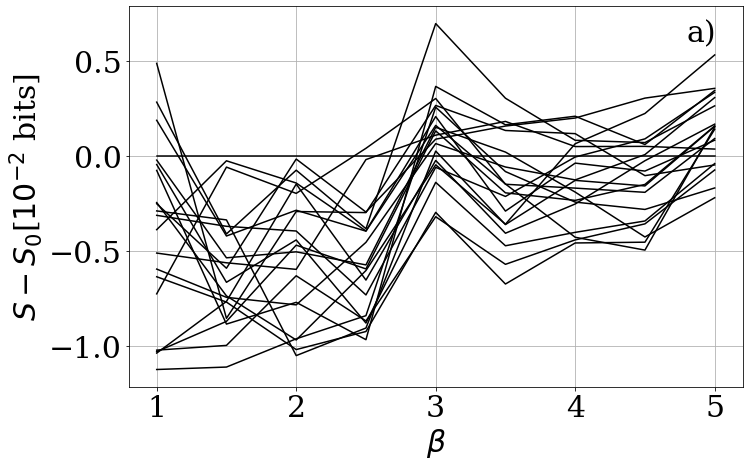

In [3]:
cv=np.loadtxt("/home/valentina/Skeleton/Data/Simulaciones/Entropias/entropiasCV.txt")
betas=[1.0+(0.5*i) for i in range(9)]

plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 30
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  
%matplotlib inline

plt.figure(figsize=(11,7))
plt.tight_layout()
plt.subplots_adjust(wspace = 0.22)

"""ax1=plt.subplot(121)    
plt.ylabel("$S$ [Sh]")
plt.xlabel("$\\beta$")
for i in range(len(v[0])):
    plt.plot(betas,cv[:,i],color="k")"""
    
#ax2=plt.subplot(122)


plt.ylabel("$S-S_0$[$10^{-2}$ bits]")
plt.xlabel("$\\beta$")
plt.grid()
plt.text(4.8,0.6,"a)",fontsize=MEDIUM_SIZE)
#plt.axis("auto")
for i in range(len(cv[0])):
    plt.plot(betas,(cv[:,i]-cv[:,0])*100,c="k")
    
plt.savefig("cosmic_variance_n.pdf", bbox_inches='tight')

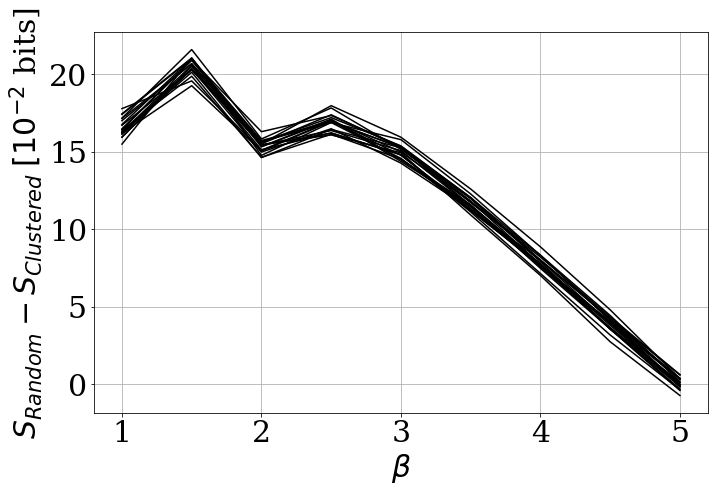

In [32]:
random=np.loadtxt("/home/valentina/Skeleton/Data/Simulaciones/Entropias/entropias_random.txt")


plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 30
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  
%matplotlib inline

plt.figure(figsize=(11,7))
plt.tight_layout()

"""ax1=plt.subplot(121)    
plt.ylabel("$S$ [Sh]")
plt.xlabel("$\\beta$")
for i in range(len(random[0])):
    plt.plot(betas,random[:,i],color="k",linewidth=3)
    plt.plot(betas,cv[:,i],"-",color="k",alpha=0.5,linewidth=0.3)
    
plt.legend(("Random","Clustered"),fontsize=MEDIUM_SIZE)
    
ax2=plt.subplot(122)"""


plt.ylabel("$S_{Random}-S_{Clustered}\;[10^{-2}$ bits]")
plt.xlabel("$\\beta$")
plt.grid()
for i in range(len(random[0])):
    plt.plot(betas,(random[:,i]-cv[:,i])*100,c="k")
    
    
plt.savefig("random_clustered_n.pdf", bbox_inches='tight')

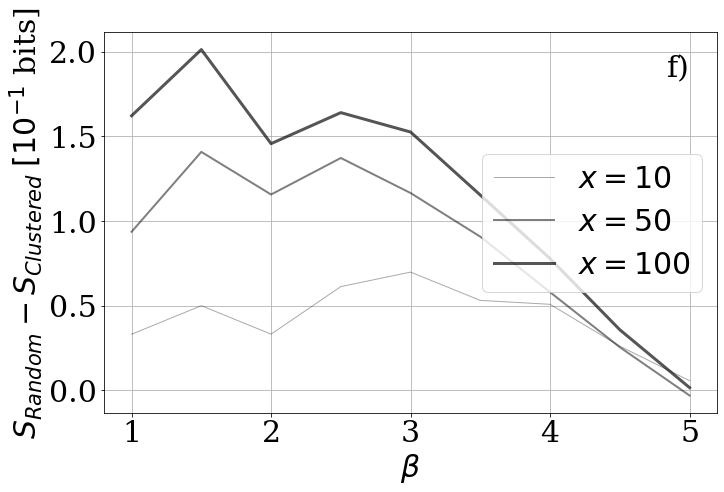

In [5]:
n_random=np.loadtxt("/home/valentina/Skeleton/Data/Simulaciones/Entropias/entropias_n_random.txt")
n_clustered=np.loadtxt("/home/valentina/Skeleton/Data/Simulaciones/Entropias/entropias_n_clustered.txt")


plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 30
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  
%matplotlib inline

plt.figure(figsize=(11,7))
plt.tight_layout()

"""ax1=plt.subplot(121)    
plt.ylabel("$S$ [Sh]")
plt.xlabel("$\\beta$")
for i in range(len(random[0])):
    plt.plot(betas,random[:,i],color="k",linewidth=3)
    plt.plot(betas,cv[:,i],"-",color="k",alpha=0.5,linewidth=0.3)
    
plt.legend(("Random","Clustered"),fontsize=MEDIUM_SIZE)
    
ax2=plt.subplot(122)"""


plt.ylabel("$S_{Random}-S_{Clustered}\;[10^{-1}$ bits]")
plt.xlabel("$\\beta$")
plt.grid()
plt.text(5,1.98,"f)",fontsize=MEDIUM_SIZE,va="top",ha="right")
iss=[0,4,9]
labels=[10,50,100]
for i in range(3):
    plt.plot(betas,(n_random[:,iss[i]]-n_clustered[:,iss[i]])*10,alpha=((i/2)+1)/3,c="k",lw=i+1,label="$x={}$".format(labels[i]))
plt.legend(fontsize=MEDIUM_SIZE,loc=7)    
plt.savefig("random_clustered_n1.pdf", bbox_inches='tight')

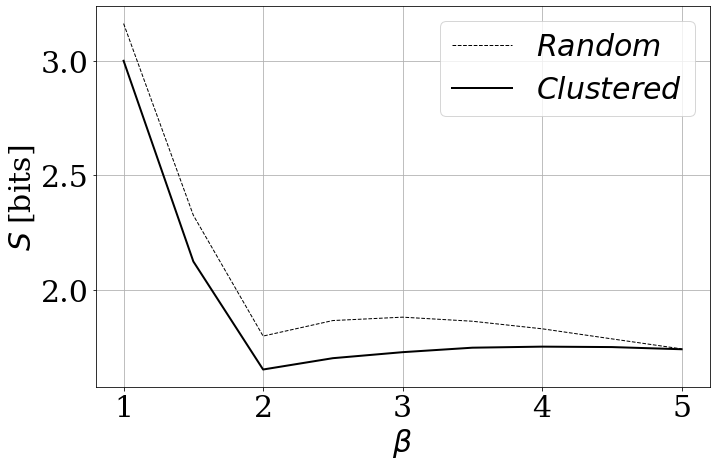

In [6]:
n_random=np.loadtxt("/home/valentina/Skeleton/Data/Simulaciones/Entropias/entropias_n_random.txt")
n_clustered=np.loadtxt("/home/valentina/Skeleton/Data/Simulaciones/Entropias/entropias_n_clustered.txt")


plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 30
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  
%matplotlib inline

plt.figure(figsize=(11,7))
plt.tight_layout()

"""ax1=plt.subplot(121)    
plt.ylabel("$S$ [Sh]")
plt.xlabel("$\\beta$")
for i in range(len(random[0])):
    plt.plot(betas,random[:,i],color="k",linewidth=3)
    plt.plot(betas,cv[:,i],"-",color="k",alpha=0.5,linewidth=0.3)
    
plt.legend(("Random","Clustered"),fontsize=MEDIUM_SIZE)
    
ax2=plt.subplot(122)"""


plt.ylabel("$S\;$[bits]")
plt.xlabel("$\\beta$")
plt.grid()
plt.plot(betas,n_random[:,9],"--",label="$Random$",lw=1,c="k")
plt.plot(betas,n_clustered[:,9],label="$Clustered$",lw=2,c="k")

plt.legend(fontsize=MEDIUM_SIZE,loc='best')    
plt.savefig("entropy.pdf", bbox_inches='tight')

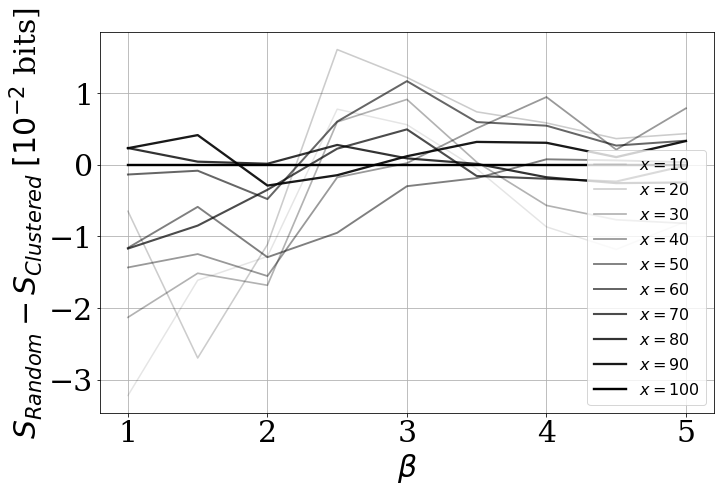

In [30]:
n_random=np.loadtxt("/home/valentina/Skeleton/Data/Simulaciones/Entropias/entropias_n_random.txt")
n_clustered=np.loadtxt("/home/valentina/Skeleton/Data/Simulaciones/Entropias/entropias_n_clustered.txt")


plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 30
SSSMALL_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  
%matplotlib inline

plt.figure(figsize=(11,7))
plt.tight_layout()

"""ax1=plt.subplot(121)    
plt.ylabel("$S$ [Sh]")
plt.xlabel("$\\beta$")
for i in range(len(random[0])):
    plt.plot(betas,random[:,i],color="k",linewidth=3)
    plt.plot(betas,cv[:,i],"-",color="k",alpha=0.5,linewidth=0.3)
    
plt.legend(("Random","Clustered"),fontsize=MEDIUM_SIZE)
    
ax2=plt.subplot(122)"""


plt.ylabel("$S_{Random}-S_{Clustered}\;[10^{-2}$ bits]")
plt.xlabel("$\\beta$")
plt.grid()
for i in range(len(n_random[0])):
    plt.plot(betas,(n_random[:,9]-n_random[:,i])*100,c="k",alpha=0.1+(i*0.1),lw=1.5+(i*0.1),label="$x={}$".format(10+i*10))
plt.legend(fontsize=SSSMALL_SIZE,loc='lower right')
plt.savefig("random_clustered_n2.pdf", bbox_inches='tight')

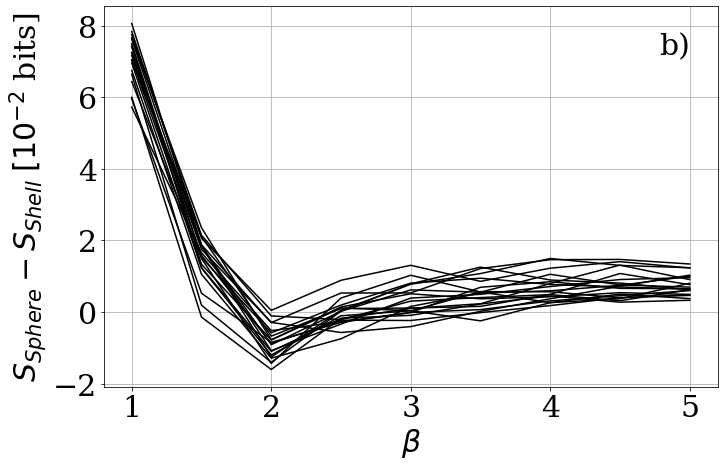

In [52]:
shell=np.loadtxt("/home/valentina/Skeleton/Data/Simulaciones/Entropias/entropias_shell.txt")


plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 30
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  
%matplotlib inline

plt.figure(figsize=(11,7))
plt.tight_layout()

"""ax1=plt.subplot(121)    
plt.ylabel("$S$ [Sh]")
plt.xlabel("$\\beta$")
for i in range(len(random[0])):
    plt.plot(betas,random[:,i],color="k",linewidth=3)
    plt.plot(betas,cv[:,i],"-",color="k",alpha=0.5,linewidth=0.3)
    
plt.legend(("Random","Clustered"),fontsize=MEDIUM_SIZE)
    
ax2=plt.subplot(122)"""


plt.ylabel("$S_{Sphere}-S_{Shell}\;[10^{-2}$ bits]")
plt.xlabel("$\\beta$")
plt.grid()
plt.text(5,7.8,"b)",fontsize=MEDIUM_SIZE,va="top",ha="right")
for i in range(len(random[0])):
    plt.plot(betas,(cv[:,i]-shell[:,i])*100,c="k")
    
plt.savefig("geometry_n.pdf", bbox_inches='tight')

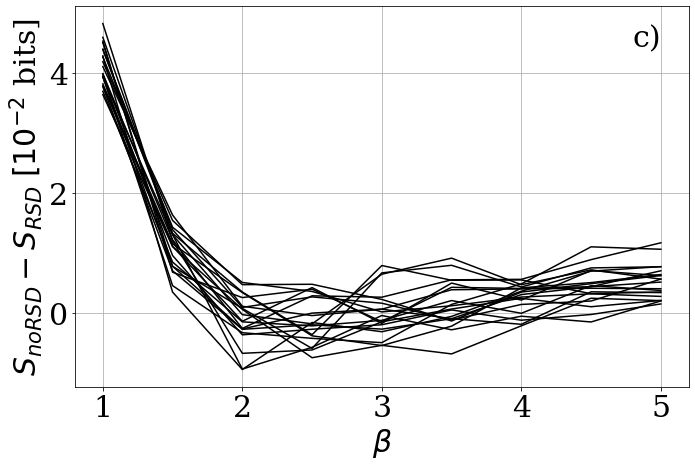

In [57]:
rsd=np.loadtxt("/home/valentina/Skeleton/Data/Simulaciones/Entropias/entropias_rsd.txt")


plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 30
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  
%matplotlib inline

plt.figure(figsize=(11,7))
plt.tight_layout()

"""ax1=plt.subplot(121)    
plt.ylabel("$S$ [Sh]")
plt.xlabel("$\\beta$")
for i in range(len(random[0])):
    plt.plot(betas,random[:,i],color="k",linewidth=3)
    plt.plot(betas,cv[:,i],"-",color="k",alpha=0.5,linewidth=0.3)
    
plt.legend(("Random","Clustered"),fontsize=MEDIUM_SIZE)
    
ax2=plt.subplot(122)"""


plt.ylabel("$S_{noRSD}-S_{RSD}\;[10^{-2}$ bits]")
plt.xlabel("$\\beta$")
plt.grid()
plt.text(5,4.8,"c)",fontsize=MEDIUM_SIZE,va="top",ha="right")
for i in range(len(random[0])):
    plt.plot(betas,(cv[:,i]-rsd[:,i])*100,c="k")
    
plt.savefig("rsd_n.pdf", bbox_inches='tight')

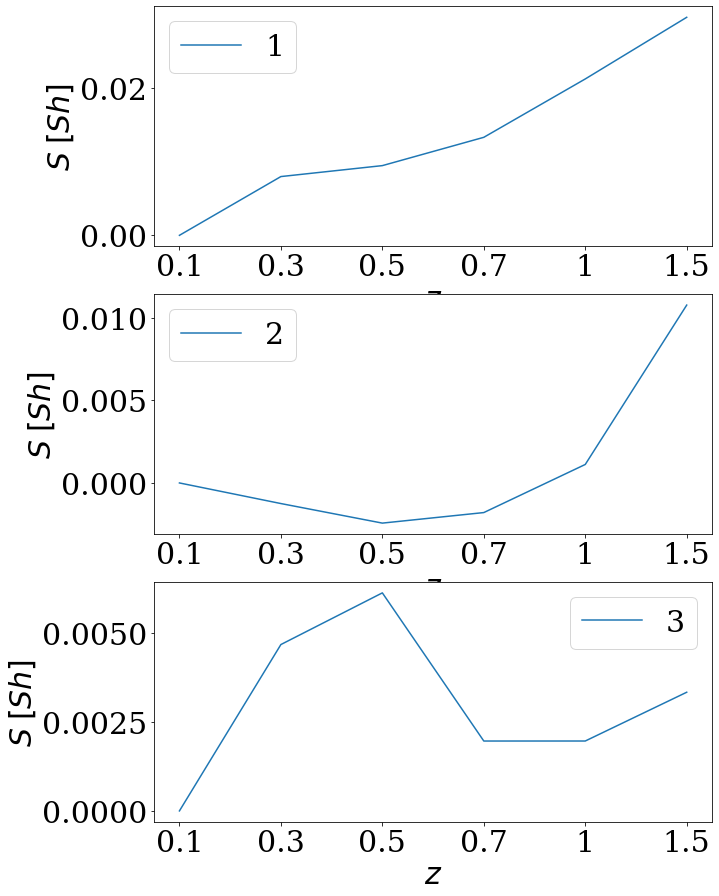

In [7]:
redshift=np.loadtxt("/home/valentina/Skeleton/Data/Simulaciones/Entropias/entropias_redshift.txt")


plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 30
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  
%matplotlib inline

plt.figure(figsize=(10,15))
plt.tight_layout()
red=["0.1","0.3","0.5","0.7","1","1.5"]

ax1=plt.subplot(311)    
plt.ylabel("$S\;[Sh]$")
plt.xlabel("$z$")
plt.plot(red,redshift[0]-redshift[0][0],label=betas[0])
plt.legend(fontsize=MEDIUM_SIZE)

    
ax2=plt.subplot(312)
plt.ylabel("$S\;[Sh]$")
plt.xlabel("$z$")
plt.plot(red,redshift[2]-redshift[2][0],label=betas[2])
plt.legend(fontsize=MEDIUM_SIZE)

ax2=plt.subplot(313)
plt.ylabel("$S\;[Sh]$")
plt.xlabel("$z$")
plt.plot(red,redshift[4]-redshift[4][0],label=betas[4])
plt.legend(fontsize=MEDIUM_SIZE)


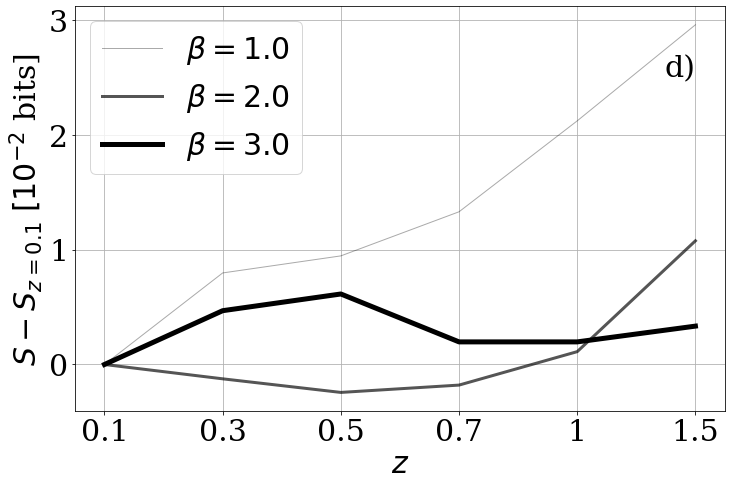

In [73]:
n=[0,2,4]

plt.figure(figsize=(11,7))
plt.ylabel("$S-S_{z=0.1}\;[10^{-2}$ bits]")
plt.xlabel("$z$")
plt.tight_layout()
plt.grid()
plt.text(5,2.7,"d)",fontsize=MEDIUM_SIZE,va="top",ha="right")
for i in n:
    plt.plot(red,(redshift[i]-redshift[i][0])*100,label="$\\beta={}$".format(betas[i]),alpha=((i/2)+1)/3,c="k",lw=i+1)
plt.legend(fontsize=MEDIUM_SIZE)

plt.savefig("redshift.pdf", bbox_inches='tight')

In [10]:
parametros=np.loadtxt("/home/valentina/Skeleton/Data/Simulaciones/Parameters/docs-pics/box_cosmo_params.dat")
#parametros=np.loadtxt("/hpcfs/home/mv.garcia/Skeleton/Data/Simulaciones/parametros/box_cosmo_params.dat")
H=parametros[:,1]
Lambda=parametros[:,2]
Omega_m =parametros[:,3]
n_s =parametros[:,4]
sigma_8 =parametros[:,5]
w_0 =parametros[:,6]
var=[H,Lambda,Omega_m,n_s,sigma_8,w_0]
en = np.loadtxt("/home/valentina/Skeleton/Data/Simulaciones/Parameters/docs-pics/entropias_param.txt") #--para no tener que volver a correrlo

In [61]:
print((en[1]-en[1][0]))
print(en[1])

[ 0.          0.01631114  0.00323324 -0.00161403  0.00387428  0.00055093
  0.00994844  0.01028477  0.00771808  0.00486533  0.0037837   0.00393929
  0.00722339  0.00583116  0.00456836  0.01057527  0.00864665  0.00589696
  0.00285746  0.00288134  0.00851367  0.00302407 -0.00076745  0.00143563
  0.00346956  0.01147201  0.00608988  0.00592943  0.00485831 -0.00305171
  0.00895995  0.00197359  0.01637056  0.01251423 -0.00263505  0.00218691
  0.00786653  0.01055354  0.00176667 -0.0006128 ]
[2.11540823 2.13171938 2.11864148 2.11379421 2.11928251 2.11595917
 2.12535667 2.125693   2.12312631 2.12027357 2.11919193 2.11934753
 2.12263162 2.12123939 2.11997659 2.1259835  2.12405488 2.12130519
 2.1182657  2.11828958 2.1239219  2.1184323  2.11464078 2.11684386
 2.11887779 2.12688024 2.12149811 2.12133766 2.12026654 2.11235652
 2.12436818 2.11738182 2.1317788  2.12792247 2.11277319 2.11759515
 2.12327476 2.12596177 2.1171749  2.11479543]


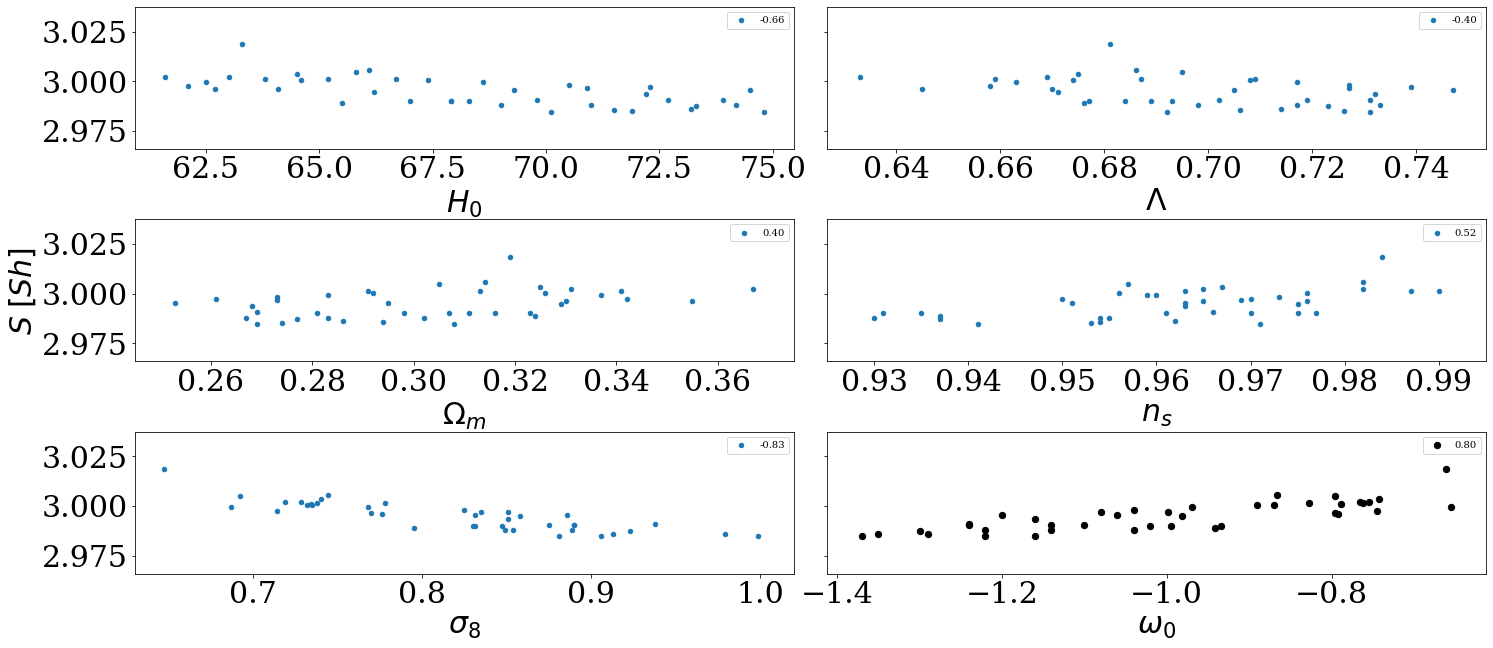

In [104]:
#var=[H,Lambda,Omega_m,n_s,sigma_8,w_0]
plt.figure(figsize=(21,9))

ax1=plt.subplot(321)
#plt.ylim(2.055,2.1)
rho1=stats.spearmanr(var[0],en[0])[0]
plt.scatter(var[0], en[0], s=20, marker="o",label="{0:.2f}".format(rho1))
plt.xlabel("$H_0$")
plt.legend()

ax2=plt.subplot(322,sharey=ax1)
#plt.ylim(2.055,2.1)
plt.xlim(0.62,0.76)
rho2=stats.spearmanr(var[1],en[0])[0]
plt.scatter(var[1], en[0], s=20, marker="o",label="{0:.2f}".format(rho2))
plt.setp(ax2.get_yticklabels(), visible=False)
plt.axis("auto")
plt.xlabel("$\\Lambda$")
plt.legend()

#verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
ax3=plt.subplot(323)
#plt.ylim(2.055,2.1)
plt.xlim(0.245,0.375)
rho3=stats.spearmanr(var[2],en[0])[0]
plt.ylabel("$S\;[Sh]$")
plt.scatter(var[2], en[0], s=20, marker="o",label="{0:.2f}".format(rho3))
plt.xlabel("$\\Omega_m$")
plt.legend()

ax4=plt.subplot(324,sharey=ax1)
#plt.ylim(2.055,2.1)
plt.xlim(0.925,0.995)
rho4=stats.spearmanr(var[3],en[0])[0]
plt.scatter(var[3], en[0], s=20, marker="o",label="{0:.2f}".format(rho4))
plt.setp(ax4.get_yticklabels(), visible=False)
plt.xlabel("$n_s$")
plt.legend()

ax5=plt.subplot(325)
#plt.ylim(2.055,2.1)
plt.xlim(0.63,1.02)
rho5=stats.spearmanr(var[4],en[0])[0]
plt.scatter(var[4], en[0], s=20, marker="o",label="{0:.2f}".format(rho5))
plt.xlabel("$\\sigma_8$")
plt.legend()

ax6=plt.subplot(326,sharey=ax1)
#plt.ylim(2.055,2.1)
rho6=stats.spearmanr(var[5],en[0])[0]
plt.scatter(var[5], en[0], s=40,  marker="o",label="{0:.2f}".format(rho6),c="k")
plt.setp(ax6.get_yticklabels(), visible=False)
plt.xlabel("$\\omega_0$")
plt.legend()


plt.tight_layout(pad=0.7, w_pad=0.5, h_pad=0)
#plt.tight_layout()
plt.savefig("param_b1_paper.pdf")
plt.show()

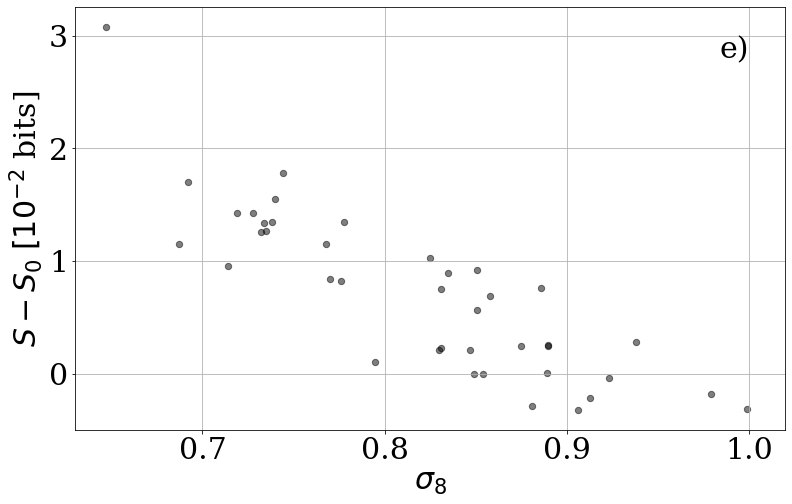

In [68]:
#var=[H,Lambda,Omega_m,n_s,sigma_8,w_0]

for i in range(1):
    
    plt.figure(figsize=(11,7))
    plt.subplots_adjust(wspace = 0.2)
    #plt.title("$\\beta={}".format(i+1))

    """ax1=plt.subplot(321)
    #plt.ylim(1.132,1.16)
    rho1=stats.spearmanr(var[0],en[i])[0]
    plt.scatter(var[0], en[i], s=40, marker="o",label="$\\rho=${}".format(round(rho1,2)),c="k",alpha=0.5)
    plt.xlabel("$H_0$")
    plt.legend(fontsize=MEDIUM_SIZE)

    ax2=plt.subplot(322,sharey=ax1)
    #plt.ylim(1.132,1.16)
    plt.xlim(0.62,0.76)
    rho2=stats.spearmanr(var[1],en[i])[0]
    plt.scatter(var[1], en[i], s=40, marker="o",label="$\\rho=${0:.2f}".format(rho2),c="k",alpha=0.5)
    plt.setp(ax2.get_yticklabels(), visible=False)
    plt.axis("auto")
    plt.xlabel("$\\Lambda$")
    plt.legend(fontsize=MEDIUM_SIZE)
    #plt.legend(loc='upper left')

    #verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
    ax3=plt.subplot(323)
    #plt.ylim(1.132,1.16)
    plt.xlim(0.245,0.375)
    plt.ylabel("$S\;[Sh]$")
    rho3=stats.spearmanr(var[2],en[i])[0]
    plt.scatter(var[2], en[i], s=40, marker="o",label="$\\rho=${0:.2f}".format(rho3),c="k",alpha=0.5)
    plt.xlabel("$\\Omega_m$")
    plt.legend(fontsize=MEDIUM_SIZE)

    ax4=plt.subplot(324,sharey=ax1)
    #plt.ylim(1.132,1.16)
    plt.xlim(0.925,0.995)
    rho4=stats.spearmanr(var[3],en[i])[0]
    plt.scatter(var[3], en[i], s=40, marker="o",label="$\\rho=${}".format(round(rho4,2)),c="k",alpha=0.5)
    plt.setp(ax4.get_yticklabels(), visible=False)
    plt.xlabel("$n_s$")
    plt.legend(fontsize=MEDIUM_SIZE)
    #plt.legend(loc='upper left')"""

    #ax5=plt.subplot(325)
    #plt.ylim(1.132,1.16)
    plt.xlim(0.63,1.02)
    #rho5=stats.spearmanr(var[4],en[i])[0]
    plt.scatter(var[4], (en[i]-en[i][0])*100, s=40, marker="o",c="k",alpha=0.5)
    plt.xlabel("$\\sigma_8$")
    plt.ylabel("$S-S_{0}\;[10^{-2}$ bits]")
    plt.grid()
    #plt.legend(fontsize=MEDIUM_SIZE)


    """ax6=plt.subplot(326,sharey=ax1)
    #plt.ylim(1.132,1.16)
    rho6=stats.spearmanr(var[5],en[i])[0]
    plt.scatter(var[5], en[i], s=40, marker="o",label="$\\rho=${}".format(round(rho6,2)),c="k",alpha=0.5)
    plt.setp(ax6.get_yticklabels(), visible=False)
    plt.xticks(np.arange(-1.3,-0.7,0.3))
    plt.xlabel("$\\omega_0$")
    plt.legend(fontsize=MEDIUM_SIZE)
    #plt.legend(loc='upper left')"""

    plt.tight_layout(pad=0.7, w_pad=0.5, h_pad=0)
    plt.text(1,3,"e)",fontsize=MEDIUM_SIZE,va="top",ha="right")
    #plt.tight_layout()
    plt.savefig("param_paper_n.pdf", bbox_inches='tight')
    plt.show()

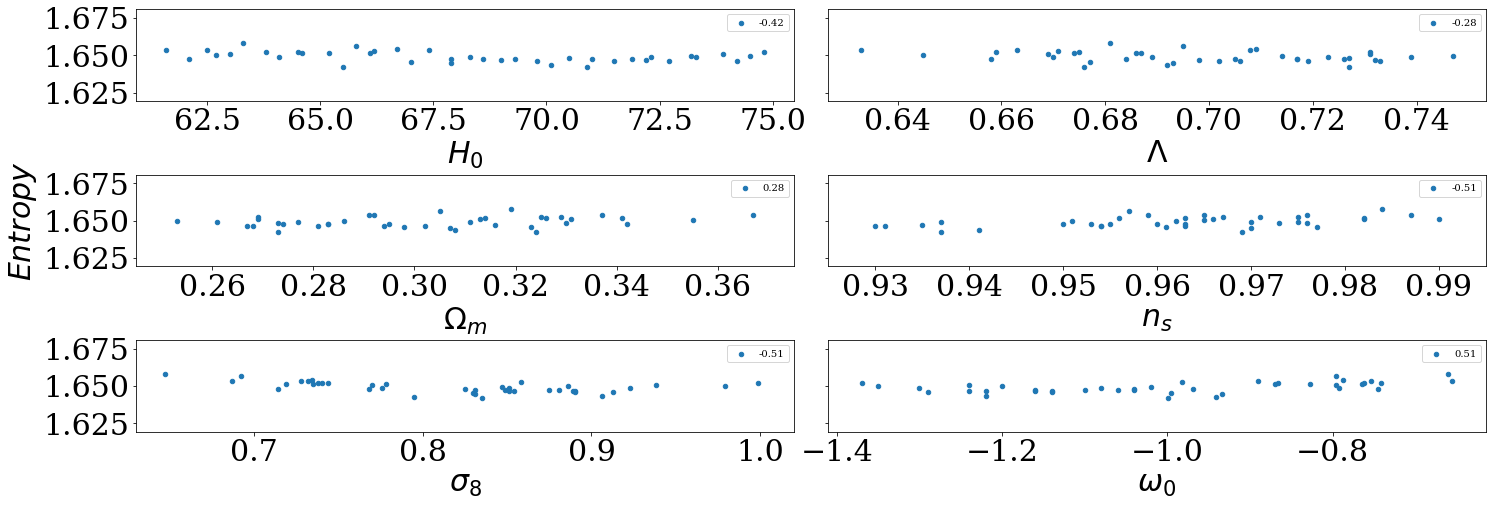

In [96]:
#var=[H,Lambda,Omega_m,n_s,sigma_8,w_0]
plt.figure(figsize=(21,7))

ax1=plt.subplot(321)
#plt.ylim(1.19,1.212)
rho1=stats.spearmanr(var[0],en[2])[0]
plt.scatter(var[0], en[2], s=20, marker="o",label=round(rho1,2))
plt.xlabel("$H_0$")
plt.legend()

ax2=plt.subplot(322,sharey=ax1)
#plt.ylim(1.187,1.213)
plt.xlim(0.62,0.76)
rho2=stats.spearmanr(var[1],en[2])[0]
plt.scatter(var[1], en[2], s=20, marker="o",label=round(rho2,2))
plt.setp(ax2.get_yticklabels(), visible=False)
plt.axis("auto")
plt.xlabel("$\\Lambda$")
plt.legend()

#verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
ax3=plt.subplot(323)
#plt.ylim(1.19,1.212)
plt.xlim(0.245,0.375)
plt.ylabel("$Entropy$")
rho3=stats.spearmanr(var[2],en[2])[0]
plt.scatter(var[2], en[2], s=20,  marker="o",label=round(rho3,2))
plt.xlabel("$\\Omega_m$")
plt.legend()

ax4=plt.subplot(324,sharey=ax1)
#plt.ylim(1.187,1.212)
plt.xlim(0.925,0.995)
rho4=stats.spearmanr(var[4],en[2])[0]
plt.scatter(var[3], en[2], s=20, marker="o",label=round(rho4,2))
plt.setp(ax4.get_yticklabels(), visible=False)
plt.xlabel("$n_s$")
plt.legend()

ax5=plt.subplot(325)
#plt.ylim(1.187,1.212)
plt.xlim(0.63,1.02)
rho5=stats.spearmanr(var[4],en[2])[0]
plt.scatter(var[4], en[2], s=20,marker="o",label=round(rho5,2))
plt.xlabel("$\\sigma_8$")
plt.legend()

ax6=plt.subplot(326,sharey=ax1)
#plt.ylim(1.19,1.212)
rho6=stats.spearmanr(var[5],en[2])[0]
plt.scatter(var[5], en[2], s=20, marker="o",label=round(rho6,2))
plt.setp(ax6.get_yticklabels(), visible=False)
plt.xlabel("$\\omega_0$")
#plt.legend(loc='upper left')
plt.legend()

plt.tight_layout(pad=0.7, w_pad=0.5, h_pad=0.0)
#plt.tight_layout()
plt.savefig("param_b3_paper.pdf")
plt.show()

In [ ]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np

print("Start")


si_random=np.loadtxt("/home/valentina/Skeleton/Data/Simulaciones/abacus/RSD/random/entropias.txt")
si_normal=np.loadtxt("/home/valentina/Skeleton/Data/Simulaciones/abacus/RSD/normal/entropias.txt")
no_random=np.loadtxt("/home/valentina/Skeleton/Data/Simulaciones/abacus/NO_RSD/random/entropias.txt")
no_normal=np.loadtxt("/home/valentina/Skeleton/Data/Simulaciones/abacus/NO_RSD/normal/entropias.txt")
betas=[1.0+(0.5*i) for i in range(9)]
  
plt.figure()
for i in range (len(si_random[1])):                                                                                                                                                                         
    #plt.plot(betas,si_random[:,i],color="blue",label="RSD_R")                                                                                                                                          
    #plt.plot(betas,si_normal[:,i],color="green",label="RSD_N")                                                                                                                                            
    #plt.plot(betas,no_random[:,i],color="red",label="NO_R")                                                                                                                                               
    plt.plot(betas,no_normal[:,i],color="black",label="NO_N")                                                                                                                                             
#plt.legend(("$RSD\;(R)$","$RSD\;(N)$","$NO\;RSD\;(R)$","$NO\;RSD\;(N)$"),) 
#plt.legend(("$With\;RSD$","$Without\;RSD$"),) 
plt.xlabel("$\\beta$")
plt.ylabel("Entropy")
plt.savefig("/home/valentina/Skeleton/Data/Simulaciones/abacus/docs-pics/solo.pdf")  
plt.show()


In [ ]:
plt.figure(figsize=(10,6))



ax1=plt.subplot(221)
for i in range (len(no_random[1])):                                                                                                                           \
    plt.plot(betas,no_random[:,i]-no_random[:,0],".--",c="red",alpha=0.5) 
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel("$E-E_0$")
plt.title("$Random$")
plt.legend(("$NO\;RSD$",),loc='upper right')

ax2=plt.subplot(222,sharey=ax1)
for i in range (len(no_random[1])):                                                                                                                           \
    plt.plot(betas,no_normal[:,i]-no_normal[:,0],".--",c="k",alpha=0.5) 
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.title("$Not\;random$")
plt.legend(("$NO\;RSD$",),loc='upper right')

#verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
ax3=plt.subplot(223,sharex=ax1,sharey=ax1)
plt.ylabel("$E-E_0$")
for i in range (len(no_random[1])):                                                                                                                           \
    plt.plot(betas,si_random[:,i]-si_random[:,0],".--",color="blue",alpha=0.5)
plt.xlabel("$\\beta$")
plt.legend(("$RSD$",),loc='upper right')


ax4=plt.subplot(224,sharex=ax1,sharey=ax1)
for i in range (len(no_random[1])):                                                                                                                           \
    plt.plot(betas,si_normal[:,i]-si_normal[:,0],".--",color="green",alpha=0.5) 
plt.setp(ax4.get_yticklabels(), visible=False)
plt.xlabel("$\\beta$")
plt.legend(("$RSD$",),loc='upper right')

plt.tight_layout(pad=0.7, w_pad=0.5, h_pad=0)
#plt.tight_layout()
plt.savefig("/home/valentina/Skeleton/Data/Simulaciones/abacus/docs-pics/E-Eo.pdf")
plt.show()

In [ ]:
for i in range (len(no_random[1])):                                                                                                                           \
    plt.plot(betas,no_normal[:,i]-no_normal[:,0],".--") 
    
plt.ylabel("$E-E_0$")
plt.xlabel("$\\beta$")
plt.tight_layout()
plt.savefig("/home/valentina/Skeleton/Data/Simulaciones/abacus/docs-pics/E-Eo.pdf")

In [ ]:
sphere=np.loadtxt("/home/valentina/Skeleton/Data/Simulaciones/Spheres/entropias")
betas=[float(i) for i in range(1,11)]

for i in range (len(sphere[1])):                                                                                                                           \
    plt.plot(betas,sphere[:,i]-sphere[:,0],".--") 
    
plt.ylabel("$E-E_0$")
plt.xlabel("$\\beta$")
plt.tight_layout()
plt.savefig("/home/valentina/Skeleton/Data/Simulaciones/Spheres/docs-pics/E-Eo.pdf")